In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
###Copy this for other files for full database combined
df06 = pd.read_csv("./Data/RB Research Data - 2006-2007.csv")
df07 = pd.read_csv("./Data/RB Research Data - 2007-2008.csv")
df08 = pd.read_csv("./Data/RB Research Data - 2008-2009.csv")
df09 = pd.read_csv("./Data/RB Research Data - 2009-2010.csv")
df10 = pd.read_csv("./Data/RB Research Data - 2010-2011.csv")
df11 = pd.read_csv("./Data/RB Research Data - 2011-2012.csv")
df12 = pd.read_csv("./Data/RB Research Data - 2012-2013.csv")
df13 = pd.read_csv("./Data/RB Research Data - 2013-2014.csv")
df14 = pd.read_csv("./Data/RB Research Data - 2014-2015.csv")
df15 = pd.read_csv("./Data/RB Research Data - 2015-2016.csv")
df16 = pd.read_csv("./Data/RB Research Data - 2016-2017.csv")
df17 = pd.read_csv("./Data/RB Research Data - 2017-2018.csv")
df18 = pd.read_csv("./Data/RB Research Data - 2018-2019.csv")
df19 = pd.read_csv("./Data/RB Research Data - 2019-2020.csv")
df20 = pd.read_csv("./Data/RB Research Data - 2020-2021.csv")
df21 = pd.read_csv("./Data/RB Research Data - 2021-2022.csv")
df22 = pd.read_csv("./Data/RB Research Data - 2022-2023.csv")
df = pd.concat([df06, df07, df08, df09, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22])
df = df[df['AAV Adjusted'] != -1]
df = df[df["Games Played"] > 8]


In [3]:
#Get nonrookie contract players who played at least half the season
vets = df[df["Rookie Contract (Y/N)"] == "N"]
vets = vets[vets["Games Played"] > 8]
vets

,Player Name,Team,Year,Rookie Contract (Y/N),Contract Length,Total Pay,Yearly Pay (AAV),Team Payroll,Player Percentage of Payroll,Games Played,...,Team Rushing Yards,Team Total Yards,Team Total Touchdowns,Player Percentage of Rushing Yards,Player Percentage of Offensive Yards,Player Percentage of Touchdowns,AAV Adjusted,Total Pay Adjusted,Payroll Adjusted,Unnamed: 0
0,Edgerrin James,ARI,2006,N,4.0,30000000.0,7.500000e+06,102000000,0.073529,16,...,1338,5262,29,0.868460,0.260927,0.206897,1.142250e+07,45690000.0,155346000.0,NaN
1,Warrick Dunn,ATL,2006,N,3.0,12450000.0,4.150000e+06,102000000,0.040686,16,...,2939,5310,30,0.387887,0.246704,0.166667,6.320450e+06,18961350.0,155346000.0,NaN
2,Jamal Lewis,BAL,2006,N,3.0,26000000.0,8.666667e+06,102000000,0.084967,17,...,1637,5072,32,0.723274,0.260844,0.281250,1.319933e+07,39598000.0,155346000.0,NaN
4,Deshaun Foster,CAR,2006,N,3.0,14500000.0,4.833333e+06,102000000,0.047386,14,...,1659,4923,26,0.543098,0.215722,0.115385,7.361167e+06,22083500.0,155346000.0,NaN
5,Thomas Jones,CHI,2006,N,4.0,9250000.0,2.312500e+06,102000000,0.022672,19,...,1918,5199,38,0.790928,0.324485,0.263158,3.521938e+06,14087750.0,155346000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,Dalvin Cook,MIN,2022,N,5.0,63000000.0,1.260000e+07,208790359,0.060348,18,...,1661,6145,48,0.748344,0.251912,0.208333,1.321740e+07,66087000.0,219021086.6,NaN
22,Alvin Kamara,NO,2022,N,5.0,75000000.0,1.500000e+07,206828041,0.072524,15,...,1982,5674,36,0.452573,0.244448,0.111111,1.573500e+07,78675000.0,216962615.0,NaN
27,Christian McCaffrey,SF,2022,N,4.0,64063500.0,1.601588e+07,206082457,0.077716,14,...,2360,6216,50,0.416949,0.242761,0.260000,1.680065e+07,67202611.5,216180497.4,NaN
29,Leonard Fournette,TB,2022,N,3.0,21000000.0,7.000000e+06,202960773,0.034489,17,...,1308,5894,31,0.519878,0.205124,0.193548,7.343000e+06,22029000.0,212905850.9,NaN


In [4]:
X = vets["All-Purpose Yards"].values.reshape(-1, 1)
y = vets["AAV Adjusted"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regression = LinearRegression()
regression.fit(X, y)
y_pred = regression.predict(X_test)
regression.score(X_test, y_test)

0.010683975978747928

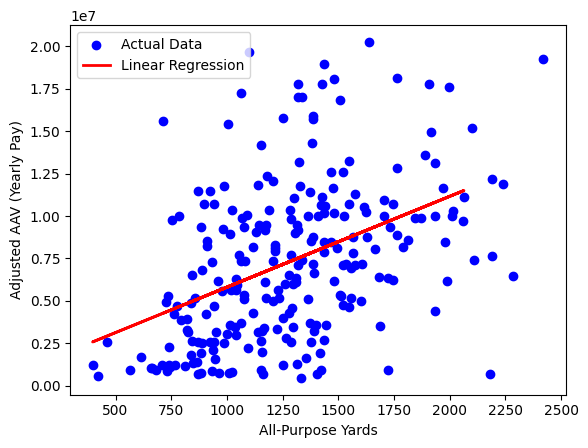

In [5]:
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('All-Purpose Yards')
plt.ylabel('Adjusted AAV (Yearly Pay)')
plt.legend()
plt.show()

In [6]:
rush = df.groupby('Year')['Rush Yards'].mean()
rec = df.groupby('Year')['Recieving Yards'].mean()


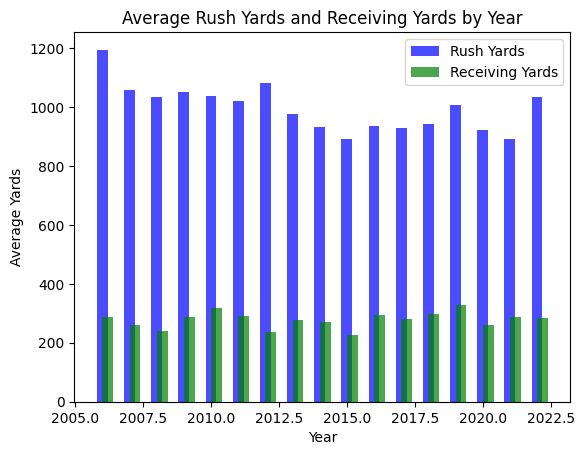

In [7]:
plt.bar(rush.index, rush, width=0.4, label='Rush Yards', align='center', color='b', alpha=0.7)
plt.bar(rec.index, rec, width=0.4, label='Receiving Yards', align='edge', color='g', alpha=0.7)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Yards')
plt.title('Average Rush Yards and Receiving Yards by Year')
plt.legend()

# Show the plot
plt.show()

In [8]:
rooks = df[df["Rookie Contract (Y/N)"] == "Y"]

r_rush = rooks.groupby('Year')['Rush Yards'].mean()
r_rec = rooks.groupby('Year')['Recieving Yards'].mean()
v_rush = vets.groupby('Year')['Rush Yards'].mean()
v_rec = vets.groupby('Year')['Recieving Yards'].mean()



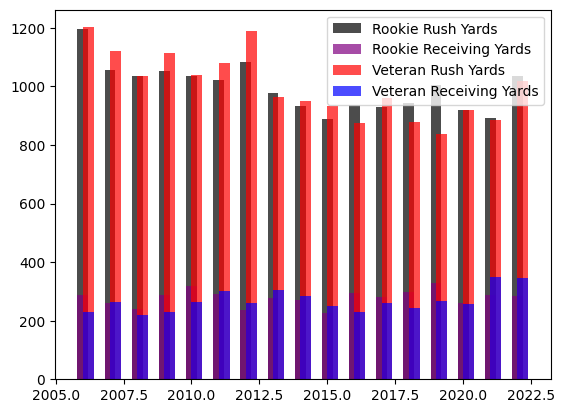

In [9]:
plt.bar(rush.index, rush, width=0.4, label='Rookie Rush Yards', align='center', color='black', alpha=0.7)
plt.bar(rec.index, rec, width=0.4, label='Rookie Receiving Yards', align='center', color='purple', alpha=0.7)
plt.bar(v_rush.index, v_rush, width=0.4, label='Veteran Rush Yards', align='edge', color='r', alpha=0.7)
plt.bar(v_rec.index, v_rec, width=0.4, label='Veteran Receiving Yards', align='edge', color='b', alpha=0.7)
plt.legend()

Text(0.5, 1.0, 'Rookie and Veteran Yards Comparison')

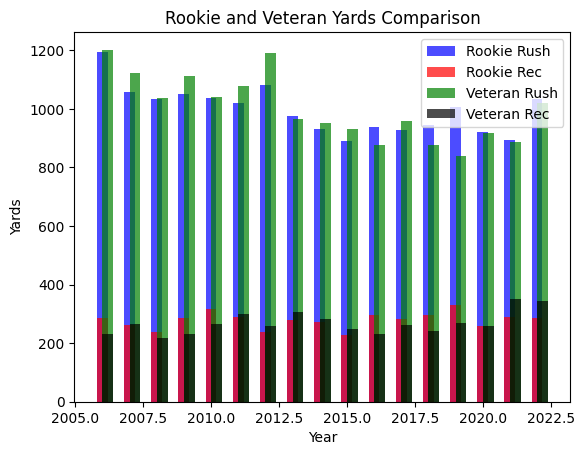

In [10]:
bar_width = 0.4
rookie_indices = rush.index
plt.bar(rookie_indices, rush, width=bar_width, label='Rookie Rush', align='center', color='blue', alpha=0.7)
plt.bar(rookie_indices, rec, width=bar_width, label='Rookie Rec', align='center', color='red', alpha=0.7)

# Veteran statistics
veteran_indices = v_rush.index
plt.bar(veteran_indices, v_rush, width=bar_width, label='Veteran Rush', align='edge', color='green', alpha=0.7)
plt.bar(veteran_indices, v_rec, width=bar_width, label='Veteran Rec', align='edge', color='black', alpha=0.7)

# Add legend
plt.legend()

# Add labels and title as needed
plt.xlabel('Year')
plt.ylabel('Yards')
plt.title('Rookie and Veteran Yards Comparison')

In [11]:
r_apy = rooks.groupby('Year')['All-Purpose Yards'].mean()
v_apy = vets.groupby('Year')['All-Purpose Yards'].mean()

Text(0.5, 1.0, 'Rookie and Veteran All-Purpose Yards Comparison')

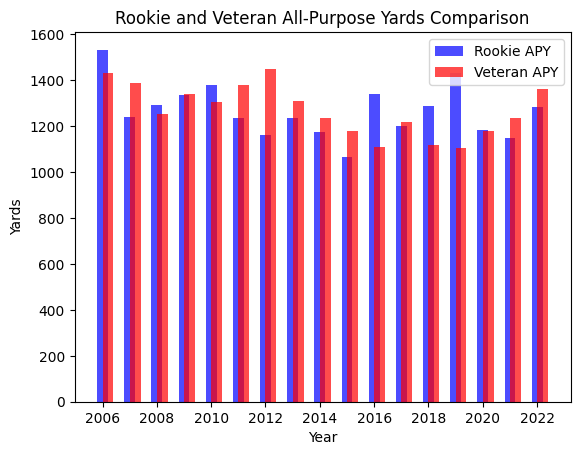

In [12]:
plt.bar(r_apy.index, r_apy, width=0.4, label='Rookie APY', align='center', color='blue', alpha=0.7)
plt.bar(v_apy.index, v_apy, width=0.4, label='Veteran APY', align='edge', color='red', alpha=0.7)
plt.legend()
plt.xticks(list(map(int, r_apy.index[::2])))
plt.xlabel('Year')
plt.ylabel('Yards')
plt.title('Rookie and Veteran All-Purpose Yards Comparison')

In [13]:
percentage_difference = ((r_apy - v_apy) / v_apy) * 100
percentage_difference

Year
2006     7.104321
2007   -10.566942
2008     3.209541
2009    -0.400122
2010     5.894111
2011   -10.257340
2012   -19.845713
2013    -5.606625
2014    -4.752756
2015    -9.904687
2016    21.096543
2017    -1.630081
2018    15.130334
2019    29.574514
2020     0.489274
2021    -7.118027
2022    -5.945226
Name: All-Purpose Yards, dtype: float64

In [14]:
percentage_difference.mean()

0.38065396725481065

In [15]:
vets['Blocking Percentage'] = vets['QB Pressure Allowed (PR)'] / vets['Total Pressure Oppurtnuties (OPP)']
rooks['Blocking Percentage'] = rooks['QB Pressure Allowed (PR)'] / rooks['Total Pressure Oppurtnuties (OPP)']


/var/folders/zg/329ty9ws0hlfcxk3nkfm6s9r0000gn/T/ipykernel_84454/3483880397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rooks['Blocking Percentage'] = rooks['QB Pressure Allowed (PR)'] / rooks['Total Pressure Oppurtnuties (OPP)']


In [16]:
v_Block = vets.groupby('Year')['Blocking Percentage'].mean()
r_Block = rooks.groupby('Year')['Blocking Percentage'].mean()

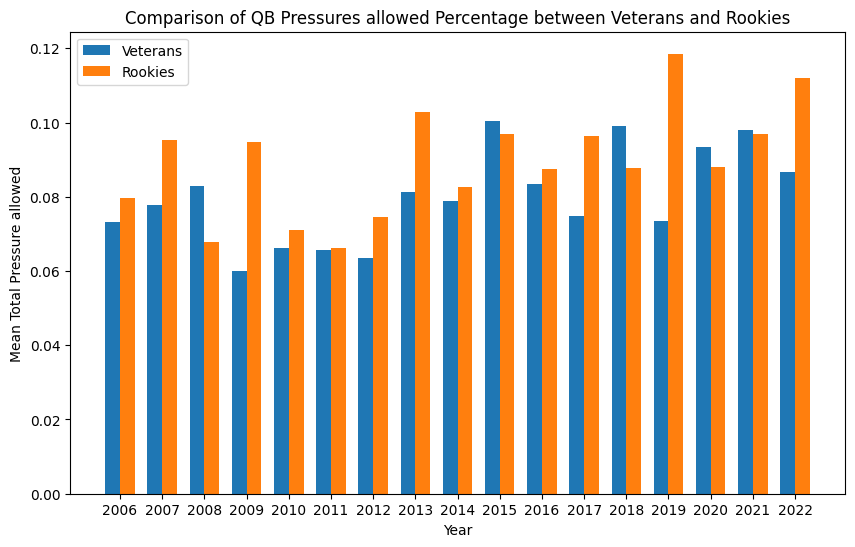

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = v_Block.index
bar1 = ax.bar(index, v_Block, bar_width, label='Veterans')
bar2 = ax.bar(index + bar_width, r_Block, bar_width, label='Rookies')

ax.set_xlabel('Year')
ax.set_ylabel('Mean Total Pressure allowed')
ax.set_title('Comparison of QB Pressures allowed Percentage between Veterans and Rookies')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(index)
ax.legend()

plt.show()